In [14]:
# A cell to run functions directly.
using Reexport
using Distributions
using Statistics
using Meshes
using Distances
using Random
using GeoTables
using DataFrames
import GLMakie as Mke
using Infiltrator
using AbstractGPs
using ProgressMeter
using Unitful
using JLD2
using Plots
using DataStructures
using POMDPModelTools
using POMDPs
using ParticleFilters
using LinearAlgebra
include("../src/config.jl");
include("../src/pomdp.jl")
# pomdp = CCSPOMDP();

FEATURE = :topSealThickness


:topSealThickness

In [15]:
# visualize_gt(pomdp, 2)

### Test: Action function returns all actions

In [16]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

w/o scaling, For layer 1, column z, 
mean uncertainty: 200.0 
with scaling factor: 150.0, mean uncertainty after scaling: 1.3333333333333326
w/o scaling, For layer 1, column z, 
mean uncertainty: 192.02338388505862 
with scaling factor: 150.0, mean uncertainty after scaling: 1.280155892567057
Action: seismic_action, 
zzzAction Cost: -4, 
zzzUncertainty Change: 5.574756678089443, 
zzzSuitability: 1.09375
@NamedTuple{sp::CCSState, o::Vector{Any}, r::Float64}
Reward: 2.668506678089443
Categorical{Float64, Vector{Float64}}[Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.33333333333

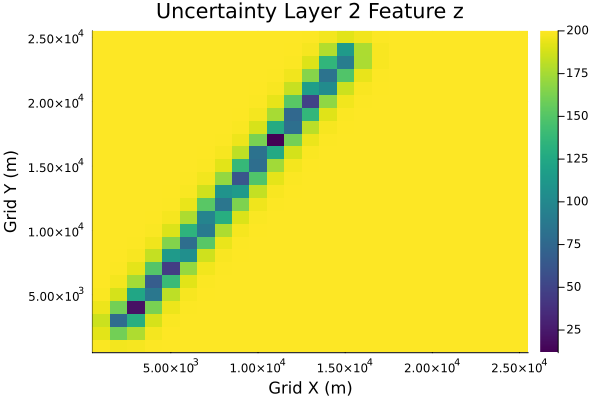

In [17]:
# Taking a seismic line action first
curstate = rand(initialstate(pomdp))
step = POMDPs.gen(pomdp, curstate, all_actions[21], nothing)
println(typeof(step), "\nReward: ", step.r)
curstate = step.sp

println(curstate.rocktype_belief)
visualize_uncertainty(curstate, 2, FEATURE)

w/o scaling, For layer 1, column z, 
mean uncertainty: 200.0 
with scaling factor: 150.0, mean uncertainty after scaling: 1.3333333333333326
w/o scaling, For layer 1, column z, 
mean uncertainty: 199.48788693977025 
with scaling factor: 150.0, mean uncertainty after scaling: 1.3299192462651344
Action: well_action, 
zzzAction Cost: -3, 
zzzUncertainty Change: 110.20156478178393, 
zzzSuitability: 1.09375
@NamedTuple{sp::CCSState, o::Vector{Any}, r::Float64}
Reward: 108.29531478178393
Categorical{Float64, Vector{Float64}}[Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 1.0, 0.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])]


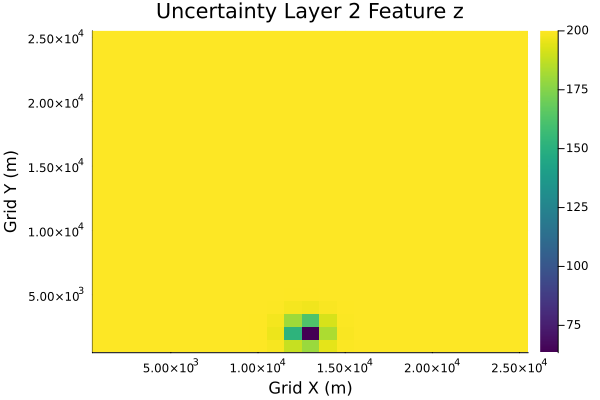

In [18]:
curstate = rand(initialstate(pomdp))
step = POMDPs.gen(pomdp, curstate, all_actions[2], nothing)
println(typeof(step), "\nReward: ", step.r)
curstate = step.sp

println(curstate.rocktype_belief)
visualize_uncertainty(curstate, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: -3.207857139621197


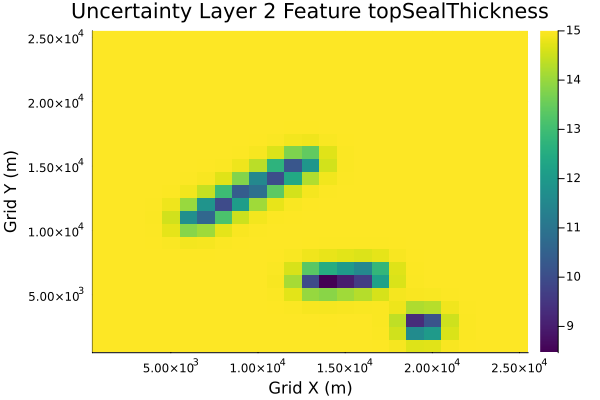

In [19]:
# Timing test for seismic line observation and reward function
distr = POMDPs.observation(pomdp, all_actions[19], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[19])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: -2.4796004256057884


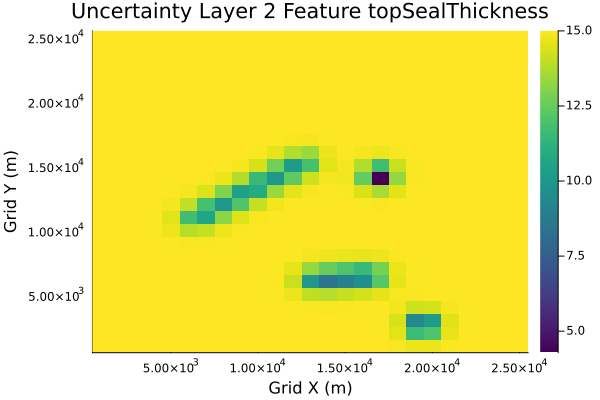

In [20]:
# Timing test for well log observation and reward function
distr = POMDPs.observation(pomdp, all_actions[1], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[1])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)